In [7]:
import xarray as xr
from utils import constants as cnst
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

#### Import probability calculation
from NFLICS import LSTA_probability_calculation as pcalc

In [3]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [17]:
## Read in any LSTA. Note: LSTA should have any cloud or other missing values set to NaN before applying probability calculation.
lpath = cnst.elements_drive+'/Africa/WestAfrica/NFLICS/LSTA_2004-2015/netcdf/'
testlsta = xr.open_dataset(lpath + 'HDF5_LSASAF_ANOM_MSG_LST_MSG-Disk_200409131700.nc')

Text(0.5, 1.0, 'Raw LSTA plot (K)')

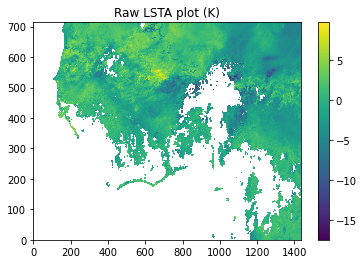

In [27]:
# Quick LSTA data check
plt.pcolormesh(testlsta['lsta'])
plt.colorbar()
plt.title(r'Raw LSTA plot (K)')

In [19]:
## Run core probability calculation from LSTA
hour = 17
table_path = cnst.elements_drive + '/Africa/WestAfrica/NFLICS/tables/prob_dictionary/'
lsta_pval = pcalc.run(hour, testlsta['lsta'].values, table_path)

In [20]:
# Probabilities and lsta have same shape
lsta_pval.shape == testlsta['lsta'].shape

True

Text(0.5, 1.0, 'Core probability adjustment from LSTA')

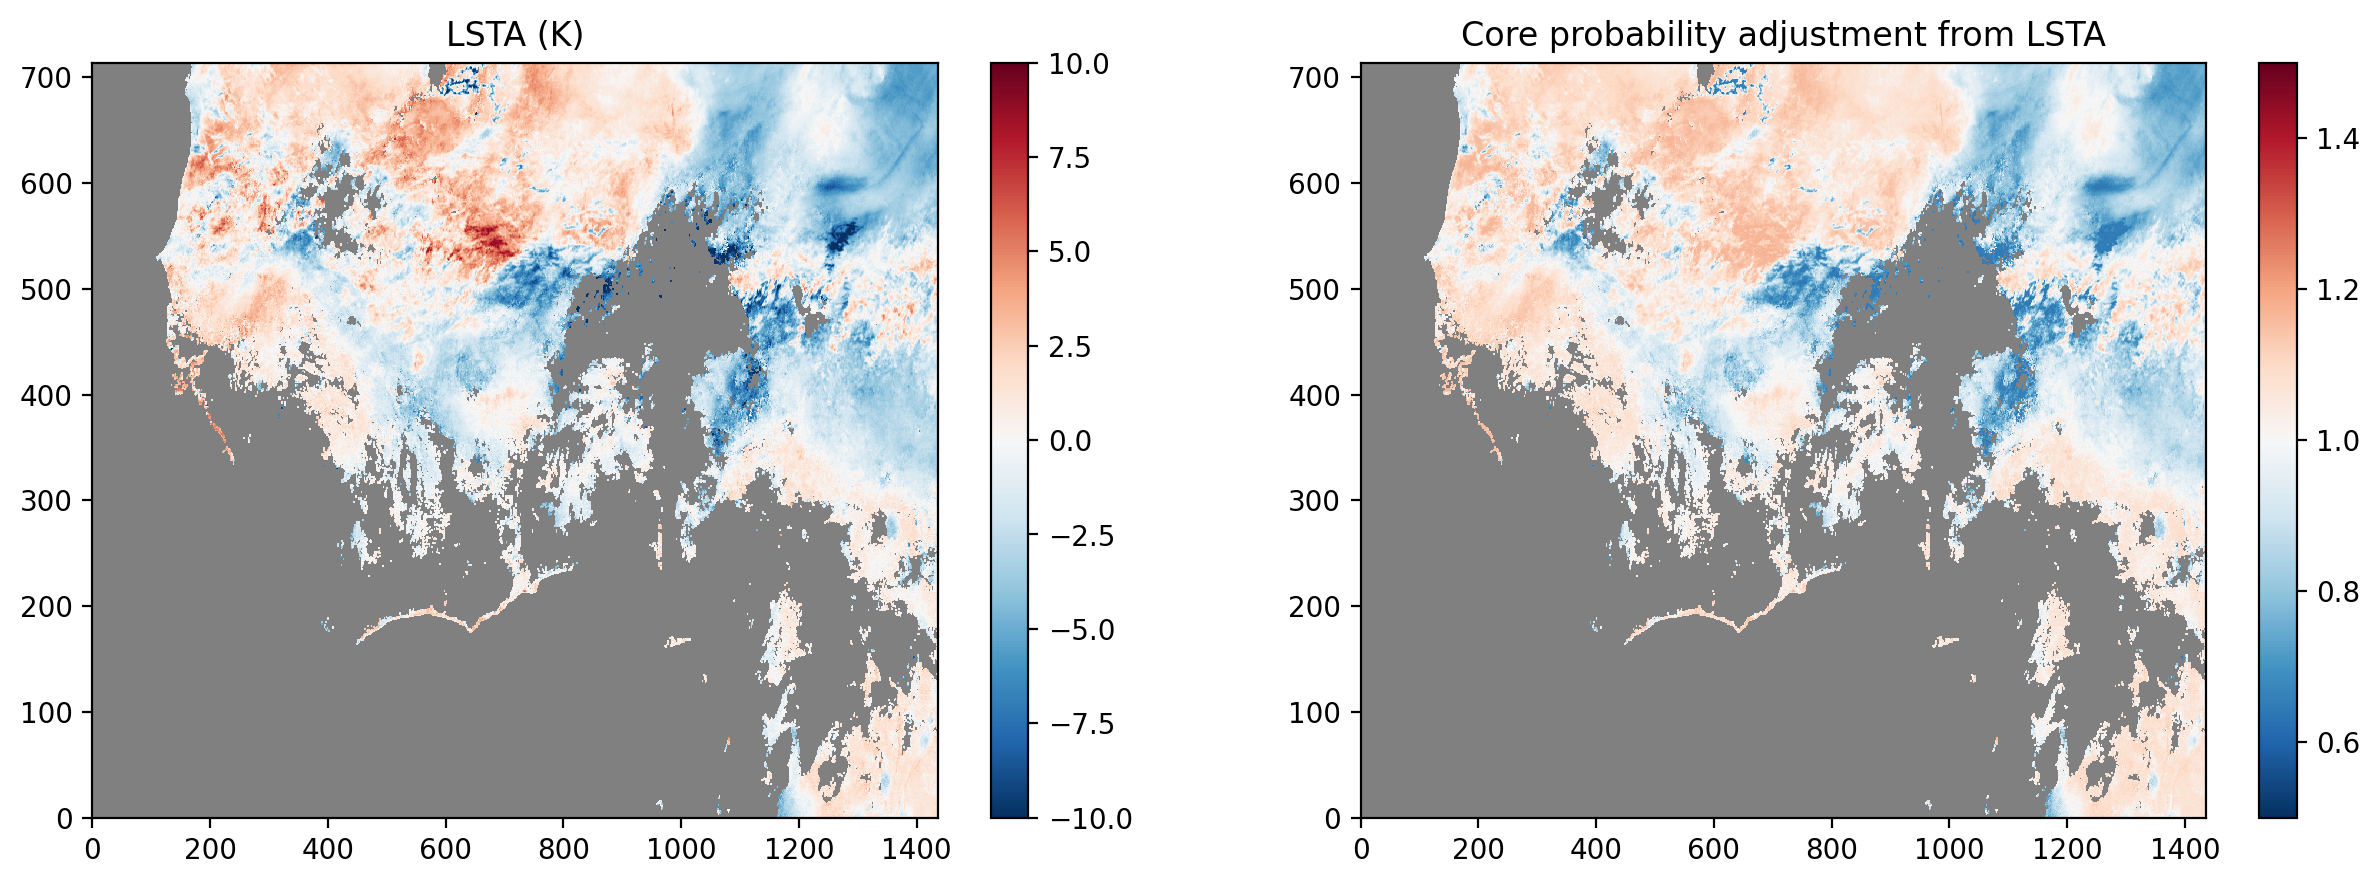

In [28]:
##### Core probability adjustment comes as factor to be multiplied with existing core probabilities i.e.:
##### Probability adjustment = 1 means no probability change. P > 1 is increase, P < 1 is reduction in probability via LSTA.

f = plt.figure(figsize=(15,5), dpi=200)
ax = f.add_subplot(121)
ax.set_facecolor('grey')
plt.pcolormesh(testlsta['lsta'].values, cmap='RdBu_r', vmin=-10, vmax=10)
plt.colorbar()
plt.title('LSTA (K)')

ax = f.add_subplot(122)
ax.set_facecolor('grey')
plt.pcolormesh(lsta_pval, cmap='RdBu_r', vmin=0.5, vmax=1.5)
plt.colorbar()
plt.title('Core probability adjustment from LSTA')